In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
LABEL = ["Normal", "Fraud"]
data = pd.read_csv("creditcard.csv", sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Distribution of normal transaction and fraudulent transaction
# lable 1 - fraudulent transactions
# label 2 - normal transactions

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'title'

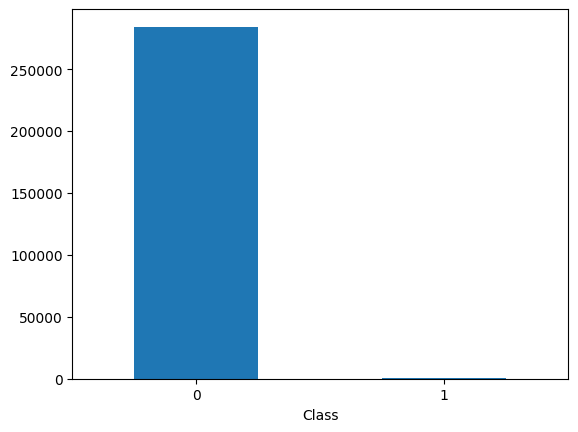

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar', rot=0)
plt.title("transaction class distribution")
plt.xticks(range(2), LABEL)
plt.xlabel("Classes")
plt.ylabel("Frequency")
Text(0,0.5,'Frequency')
plt.show()

In [7]:
data.shape

(284807, 31)

In [3]:
fraud = data[data["Class"]==1]
fraud.shape

(492, 31)

In [4]:
normal = data[data["Class"]==0]
normal.shape

(284315, 31)

In [5]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
# Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction.

In [8]:
normal_sample = normal.sample(n=492)

In [9]:
# concatenating two dataframes

In [10]:
new_data = pd.concat([normal_sample,fraud], axis = 0)
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [11]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [12]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93013.573171,0.061735,-0.060024,0.081936,-0.046197,-0.012454,0.028346,-0.132515,-0.145646,-0.004731,...,-0.039258,-0.017161,-0.010041,0.035058,-0.016495,0.025215,-0.004061,-0.005802,-0.016616,72.893841
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Cross Validation like Kfold

In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

In [21]:
X.shape

(284807, 30)

In [22]:
y.shape

(284807,)

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state = 42)

In [24]:
log_class = LogisticRegression()
grid={'C':10.0**np.arange(-2,3), 'penalty': ['l1', 'l2']}
cv=KFold(n_splits=5, random_state=None, shuffle=False)

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

In [26]:
clf=GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sk

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85226    43]
 [   53   121]]
0.9988764439450862
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85269
           1       0.74      0.70      0.72       174

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



# RandomForest Classifier , Decision Tree Classifier, Logistic Regression

In [17]:
 X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.7, random_state = 42)

In [18]:
classifier = {
   "Logistic Regression":LogisticRegression(),
   "Decision Tree Classifier":DecisionTreeClassifier()
    }
for name, clf in classifier.items():
    print(f"\n+==========={name}================")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n Precision:{precision_score(y_test, y_pred)}")
    print(f"\n Recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


+===========Logistic Regression================


C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy:0.9989516715571941

 Precision:0.6996805111821086

 Recall:0.655688622754491

 F1 Score:0.6769706336939721

+===========Decision Tree Classifier================

 Accuracy:0.9991121811752314

 Precision:0.7371601208459214

 Recall:0.7305389221556886

 F1 Score:0.7338345864661654


# Under Sampling

In [19]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.7, random_state = 42)

In [22]:
classifier = {
   "Logistic Regression":LogisticRegression(),
   "Decision Tree Classifier":DecisionTreeClassifier()
    }
for name, clf in classifier.items():
    print(f"\n+==========={name}================")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n Precision:{precision_score(y_test, y_pred)}")
    print(f"\n Recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


+===========Logistic Regression================

 Accuracy:0.9361393323657474

 Precision:0.9452887537993921

 Recall:0.9228486646884273

 F1 Score:0.9339339339339339

+===========Decision Tree Classifier================

 Accuracy:0.9042089985486212

 Precision:0.8882521489971347

 Recall:0.9198813056379822

 F1 Score:0.9037900874635568


# Over Sampling

In [23]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [24]:
X.shape

(284807, 30)

In [25]:
y.shape

(284807,)

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [31]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X_res,y_res, test_size=0.7, random_state = 42)

In [35]:
classifier = {
   "Logistic Regression":LogisticRegression(),
   "Decision Tree Classifier":DecisionTreeClassifier()
    }
for name, clf in classifier.items():
    print(f"\n+==========={name}================")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n Precision:{precision_score(y_test, y_pred)}")
    print(f"\n Recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


+===========Logistic Regression================


C:\Users\shree\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy:0.9728319444479337

 Precision:0.9829709773356579

 Recall:0.9623830274308205

 F1 Score:0.9725680598256775

+===========Decision Tree Classifier================

 Accuracy:0.9967566155245314

 Precision:0.9951957001516357

 Recall:0.9983382866781798

 F1 Score:0.9967645164443264


# Easy Ensemble

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

In [37]:
from imblearn.ensemble import EasyEnsembleClassifier

In [38]:
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=42)

In [42]:
y_pred=eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82880  2421]
 [   17   125]]
0.9714663576887516
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443

